# Analyzing the Error of One Orbit Without Drag

## The Error Code:

To find the error of one of Juno's orbits without including drag, we must use the numerically calculated and analytically calculated solutions. The numerically computed solution is Juno's theoretical position in the orbit in their given timesteps and can be solved by iterating through the Velocity Verlet function that was derived. The real solution is found with the previously derived analytical solution function which will return Juno's actual position in the same time step as the numerically calculated solution. For each numerical position calculated the actual position will be subtracted and added to an error element within the code. This error is then graphed for every time set given in both functions. The code and error graph are seen below.

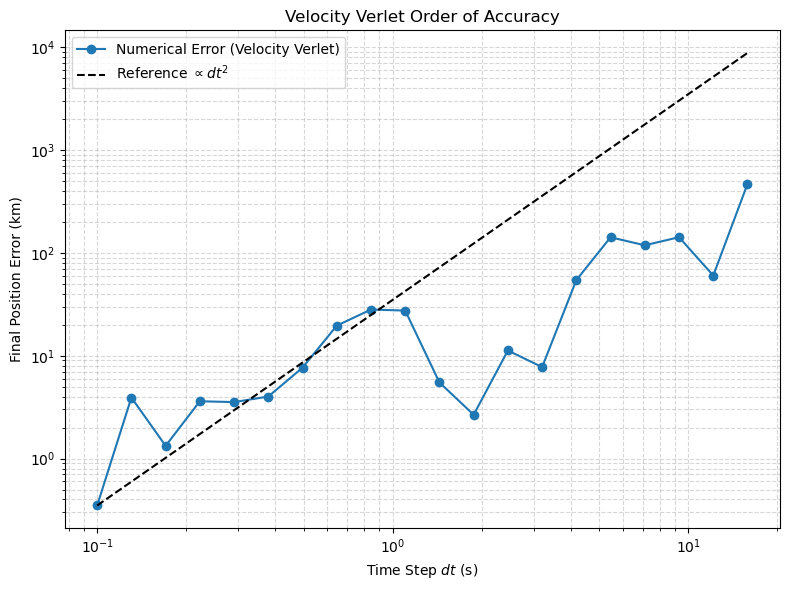

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitational parameter for Jupiter (km^3/s^2)
mu = 126.687e6

# Initial position (km)
r_o = np.array([100000, 0, 0])
r_mag = np.linalg.norm(r_o)

# Circular orbit velocity
v_circ = np.sqrt(mu / r_mag)
v_o = np.array([0, v_circ, 0])

# Final time (s), one orbital period
T = 2 * np.pi * np.sqrt(r_mag**3 / mu)

# Gravity function
def gravity(r):
    r_mag = np.linalg.norm(r)
    return -mu * r / r_mag**3

# Velocity Verlet integrator
def velocity_verlet(r0, v0, dt, T):
    num_steps = int(T / dt)
    positions = np.zeros((num_steps + 1, 3))
    velocities = np.zeros((num_steps + 1, 3))

    positions[0] = r0
    velocities[0] = v0

    a0 = gravity(r0)

    for k in range(num_steps):
        r_new = positions[k] + velocities[k] * dt + 0.5 * a0 * dt**2
        v_half = velocities[k] + 0.5 * a0 * dt
        a1 = gravity(r_new)
        v_new = v_half + 0.5 * a1 * dt

        positions[k + 1] = r_new
        velocities[k + 1] = v_new
        a0 = a1

    return positions[-1]  # Return final position only

# Analytical solution at final time
def analytical_position(r0, T):
    omega = np.sqrt(mu / np.linalg.norm(r0)**3)
    x = r0[0] * np.cos(omega * T)
    y = r0[0] * np.sin(omega * T)
    return np.array([x, y, 0])

# Time step sizes to test
dt_values = np.logspace(-1, 1.2, 20)  # From 0.1 to ~16 s

# Compute errors
errors = []

for dt in dt_values:
    r_num = velocity_verlet(r_o, v_o, dt, T)
    r_true = analytical_position(r_o, T)
    error = np.linalg.norm(r_num - r_true)
    errors.append(error)

errors = np.array(errors)

# Reference line for dt^2 scaling
ref_dt = dt_values
ref_error = errors[0] * (ref_dt / ref_dt[0])**2  # Scale from first error value

plt.figure(figsize=(8, 6))
plt.loglog(dt_values, errors, 'o-', label='Numerical Error (Velocity Verlet)')
plt.loglog(ref_dt, ref_error, 'k--', label=r'Reference $\propto dt^2$')

plt.xlabel('Time Step $dt$ (s)')
plt.ylabel('Final Position Error (km)')
plt.title('Velocity Verlet Order of Accuracy')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Error vs Time Graph Analysis:

The error function begins with zero error and seemingly follows the Global truncation dotted error line until the 1 second time step where it creates unpredictable errors in the orbit. This reveals information about the best time step for our function. The error represented also shows the accuracy of using a Velocity Verlet function. While we expected a steady linear increase in error for this numerical method, we found that the actual error fluctuates as time increases. Although it fluctuates, there is a noticeable increase over time with the highest error being about $10^3$ km. 
